In [71]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px


import wordcloud
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')
import re 
import nltk 
import spacy
import string
import itertools
import contractions
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amr_a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amr_a\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amr_a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\amr_a\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


##### Load data

In [72]:
# Read the dataset from csv file
df = pd.read_csv("Data/Kindle_review.csv")
df.head()

,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


In [73]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12000 non-null  int64 
 1   rating      12000 non-null  int64 
 2   reviewText  12000 non-null  object
 3   summary     12000 non-null  object
dtypes: int64(2), object(2)
memory usage: 375.1+ KB


In [74]:
for row in df.head(10).iterrows():
    print(row[1]['reviewText'], row[1]['summary'], row[1]['rating']) 

This book was the very first bookmobile book I bought when I was in the school book club. I loved the story then and I bet a dollar to a donut I will love it again. If my memory serves, I bought this book in 5th grade. That would have been about 1961. I am looking forward to reliving the memories. 50 + years ago... 5
When I read the description for this book, I couldn't wait to read it. Once I downloaded it to my Kindle, I found it extremely hard to keep reading it.  To be honest, I stopped reading halfway through the book. It began slow and remained a slow, uninteresting read.  It lacked passion; not making love passion, but passion for life. Neither Jada or Aaron were interesting characters and the story was too, too `everything is perfect'.  Everybody is just so understanding and accommodating--the bit of drama with his father and her grandmother was blah.  To give an example of what I mean (and there are MANY), Aaron finally finds out almost  half way into the book that he fathered

###### Exploration

In [75]:
# a) Number of stop words

df['stopwords'] = df['reviewText'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['reviewText','stopwords']].head()

,reviewText,stopwords
0,This book was the very first bookmobile book I...,24
1,"When I read the description for this book, I c...",170
2,I just had to edit this review. This book is a...,149
3,I don't normally buy 'mystery' novels because ...,25
4,"This isn't the kind of book I normally read, a...",28


In [76]:
# b) Number of Punctuations
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

df['punctuation'] = df['reviewText'].apply(lambda x: count_punct(x))
df[['reviewText','punctuation']].head()


,reviewText,punctuation
0,This book was the very first bookmobile book I...,6
1,"When I read the description for this book, I c...",68
2,I just had to edit this review. This book is a...,139
3,I don't normally buy 'mystery' novels because ...,15
4,"This isn't the kind of book I normally read, a...",11


In [77]:
# c) Number of hastag character 

df['hastags'] = df['reviewText'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['reviewText','hastags']].head()

,reviewText,hastags
0,This book was the very first bookmobile book I...,0
1,"When I read the description for this book, I c...",0
2,I just had to edit this review. This book is a...,0
3,I don't normally buy 'mystery' novels because ...,0
4,"This isn't the kind of book I normally read, a...",0


In [78]:
df.hastags.loc[df.hastags != 0].count()

66

In [79]:
# d) number of numeric 

df['numerics'] = df['reviewText'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['reviewText','numerics']].head()

,reviewText,numerics
0,This book was the very first bookmobile book I...,0
1,"When I read the description for this book, I c...",1
2,I just had to edit this review. This book is a...,8
3,I don't normally buy 'mystery' novels because ...,0
4,"This isn't the kind of book I normally read, a...",0


In [80]:
# e) Number of Uppercase words

df['upper'] = df['reviewText'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['reviewText','upper']].head()

,reviewText,upper
0,This book was the very first bookmobile book I...,7
1,"When I read the description for this book, I c...",17
2,I just had to edit this review. This book is a...,58
3,I don't normally buy 'mystery' novels because ...,7
4,"This isn't the kind of book I normally read, a...",3


###### EDA

In [81]:
# Product Scores
fig = px.histogram(df, x="rating")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

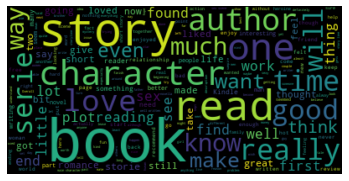

In [82]:
from wordcloud import WordCloud
# Create stopword list:
textt = " ".join(review for review in df.reviewText)
wordcloud = WordCloud()
wordcloud.generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show();

###### Distributuion of StopWords

D:\programfiles\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

D:\programfiles\anaconda\lib\site-packages\seaborn\distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



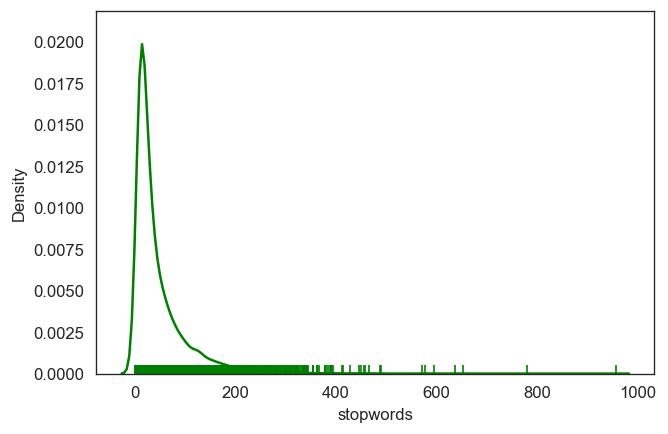

In [83]:
from matplotlib.pyplot import figure
from matplotlib.pyplot import figure

figure(dpi= 120)
sns.distplot(df.stopwords, rug=True, hist=False, color = 'green')
plt.show();

In [84]:
df = df.loc[df.stopwords <= 200]
df.head()

,Unnamed: 0,rating,reviewText,summary,stopwords,punctuation,hastags,numerics,upper
0,0,5,This book was the very first bookmobile book I...,50 + years ago...,24,6,0,0,7
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!,170,68,0,1,17
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!,149,139,0,8,58
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.,25,15,0,0,7
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!,28,11,0,0,3


In [85]:
df.shape

(11665, 9)

###### Distribtuion of Punctuation

<AxesSubplot:xlabel='punctuation', ylabel='Density'>

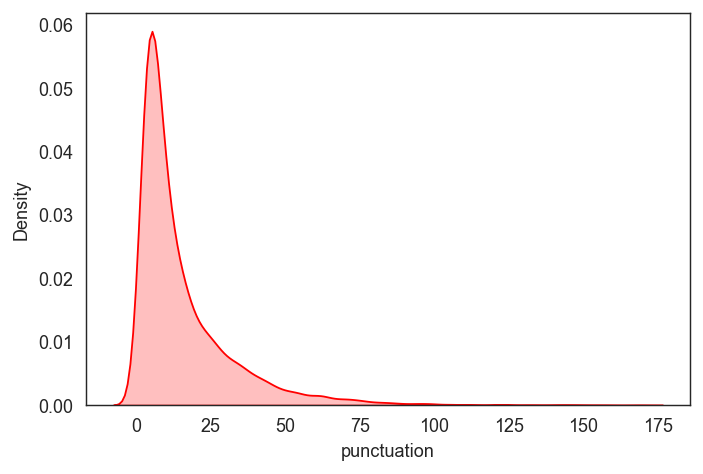

In [86]:
figure(dpi= 130)
sns.kdeplot(df.punctuation,shade=True, color = 'red')

In [87]:
df = df.loc[df.punctuation <= 70]
df.head()

,Unnamed: 0,rating,reviewText,summary,stopwords,punctuation,hastags,numerics,upper
0,0,5,This book was the very first bookmobile book I...,50 + years ago...,24,6,0,0,7
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!,170,68,0,1,17
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.,25,15,0,0,7
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!,28,11,0,0,3
6,6,3,I bought this book because I loved the cover a...,Hot Civil War Read... I wanted more Romance,48,11,0,0,5


In [88]:
df.shape

(11465, 9)

###### Distribtuion of hastags

<Figure size 780x520 with 0 Axes>

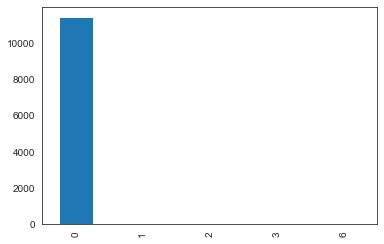

<Figure size 780x520 with 0 Axes>

In [89]:
df.hastags.value_counts().plot(kind= 'bar')
figure(dpi= 130)

###### Distribtuion of numerics

<Figure size 780x520 with 0 Axes>

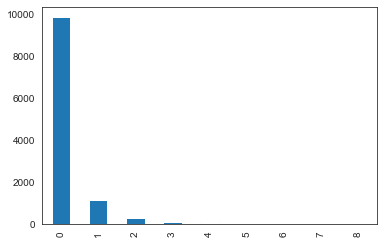

<Figure size 780x520 with 0 Axes>

In [90]:
df.numerics.value_counts().plot(kind= 'bar')
figure(dpi= 130)

In [91]:
df = df.loc[df.numerics <= 2]
df.head()

,Unnamed: 0,rating,reviewText,summary,stopwords,punctuation,hastags,numerics,upper
0,0,5,This book was the very first bookmobile book I...,50 + years ago...,24,6,0,0,7
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!,170,68,0,1,17
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.,25,15,0,0,7
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!,28,11,0,0,3
6,6,3,I bought this book because I loved the cover a...,Hot Civil War Read... I wanted more Romance,48,11,0,0,5


###### Distribtuion of upper

<Figure size 780x520 with 0 Axes>

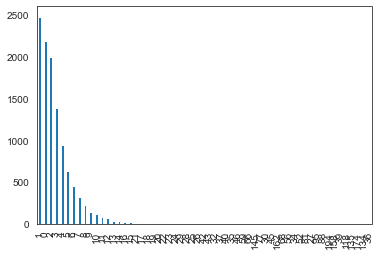

<Figure size 780x520 with 0 Axes>

In [92]:
df.upper.value_counts().plot(kind= 'bar')
figure(dpi= 130)

In [93]:
df = df.loc[df.upper <= 14]
df.shape

(11132, 9)

##### Text cleaning techniques

Normally texts have:
<ol>
<li>too many spelling mistakes in the text</li>
<li>too many numbers and punctuations</li>
<li>too many emojis and emoticons and username and links too. </li>
<li>Some of the text parts are not in the English language. Data is having a mixture of more than one language</li>
<li>Some of the words are combined with the hyphen or data having contractions word or Repetitions of words.</li>

</ol>

<p>Here i will clean the text by doing the following steps:
<ol>

<li>Ensure category name consistency</li>
<li>Lowecasing the data</li>
<li>Removing Puncuatations</li>
<li>Removing Numbers</li>
<li>Removing extra space</li>
<li>Removing Contractions</li>
<li>Removing HTML tags</li>
<li>Removing & Finding URL and Email id</li>
<li>Removing Stop Words</li>
<li>Standardizing and Spell Check</li>
</ol>

In [94]:
# Normalizing Text (lower) 

def normalize(content):
    content = content.lower()
    return content
    
# Removing Puncuatations

def remove_punct(content):
    content = content.translate(content.maketrans("", "", string.punctuation))
    return content

# Cleaning digits

def remove_num(content):
    content = ''.join([i for i in content if not i.isdigit()])

    return content

# Remove extra-space

def remove_spaces(content):
    content = " ".join(content.split())

    return content

# Remove Contraction

def remove_cont(content):
    content = contractions.fix(content)
    
    return content

# Remove Html Tags

def remove_html(content):
    # parse html content
    soup = BeautifulSoup(content, "html.parser")

    for data in soup(['style', 'script', 'code', 'a']):
        # Remove tags
        data.decompose()
    # return data by retrieving the tag content
    content = ' '.join(soup.stripped_strings)
    
    return content

# Remove URLs and E-mails (UniCode)

def remove_unicode(content):
    content = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", content)
    return content

# Removing Stop Words

def remove_stopword(content):
    STOPWORDS = set(stopwords.words('english'))
    content = " ".join([word for word in str(content).split() if word not in STOPWORDS])
    return content

# Standardizing and Spell Check

def Standardize(content):
    content = ''.join(''.join(s)[:2] for _, s in itertools.groupby(content))
    spell = Speller(lang='en')
    content = spell(content)
    return content

# Remove some Extra-words

def remove_extrawords(content):
    stop=['href','lt','gt','ii','iii','ie','quot','com']  ## This all words are most repeated words it does not make any sense
    content = content.split(" ")
    filtered_list=[]
    for i in content:
        if i not in stop:
            filtered_list.append(i)
            
    content = ' '.join(filtered_list)
    return content

In [95]:
def clean_text(content):
    
    # Normalize
    
    Normalized_content = normalize(content)
    
    # Removing Puncuatations
    
    clean_content = remove_punct(Normalized_content)

    # cleaning digits

    clean_content = remove_num(clean_content)

    # Remove extra-space
    
    clean_content = remove_spaces(clean_content)
    
    # Remove Contraction

    clean_content = remove_cont(clean_content)
    
    # Remove Html Tags

    clean_content = remove_html(clean_content)
    
    # Remove URLs and E-mails (UniCode)

    clean_content = remove_unicode(clean_content)
    
    # Removing Stop Words

    clean_content = remove_stopword(clean_content)

    # Remove some Extra-words
    
    clean_content = remove_extrawords(clean_content)

    return clean_content

In [96]:
df['reviewText'] = df['reviewText'].apply(clean_text)

In [97]:
df.head()

,Unnamed: 0,rating,reviewText,summary,stopwords,punctuation,hastags,numerics,upper
0,0,5,book first bookmobile book bought school book ...,50 + years ago...,24,6,0,0,7
3,3,5,normally buy mystery novels like however time ...,Very good read.,25,15,0,0,7
4,4,5,kind book normally read although try limit cer...,Great Story!,28,11,0,0,3
6,6,3,bought book loved cover try read civil war rom...,Hot Civil War Read... I wanted more Romance,48,11,0,0,5
7,7,5,book thoroughly enjoyed beginning end story li...,Wow and wonderful read with a twist,29,9,0,0,2


In [98]:
df.columns

Index(['Unnamed: 0', 'rating', 'reviewText', 'summary', 'stopwords',
       'punctuation', 'hastags', 'numerics', 'upper'],
      dtype='object')

###### Binning

In [99]:
df['Score']= df.rating
df.Score[df.rating <= 3] = 0
df.Score[df.rating >= 4] = 1

C:\Users\amr_a\AppData\Local\Temp\ipykernel_12456\1668043801.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\amr_a\AppData\Local\Temp\ipykernel_12456\1668043801.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
df.drop(['summary', 'Unnamed: 0', 'stopwords', 'punctuation', 'hastags', 'numerics', 'upper', 'rating'], inplace = True, axis = 1)

In [101]:
df.head()

,reviewText,Score
0,book first bookmobile book bought school book ...,1
3,normally buy mystery novels like however time ...,1
4,kind book normally read although try limit cer...,1
6,bought book loved cover try read civil war rom...,0
7,book thoroughly enjoyed beginning end story li...,1


###### Save preprocessed data

In [102]:
df.to_csv(r'Data/Amazon_reviews_processed.csv', index=False)